In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [3]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


<AxesSubplot:>

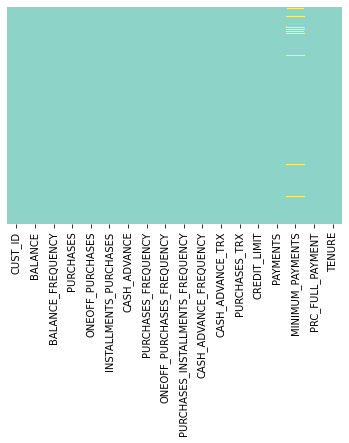

In [7]:
# It looks like we have some missing data in the minimum_payments column
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Set3' )

In [8]:
# There are 313 missing elements for minimum_payments and 1 missing element in the credit_limit column
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Changing the missing values to the mean
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [10]:
# Changing the missing values to the mean
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [11]:
# Check to see if it worked
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
creditcard_df.duplicated().sum()

0

In [13]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [14]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
n = len(creditcard_df.columns)
n 

17

In [16]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

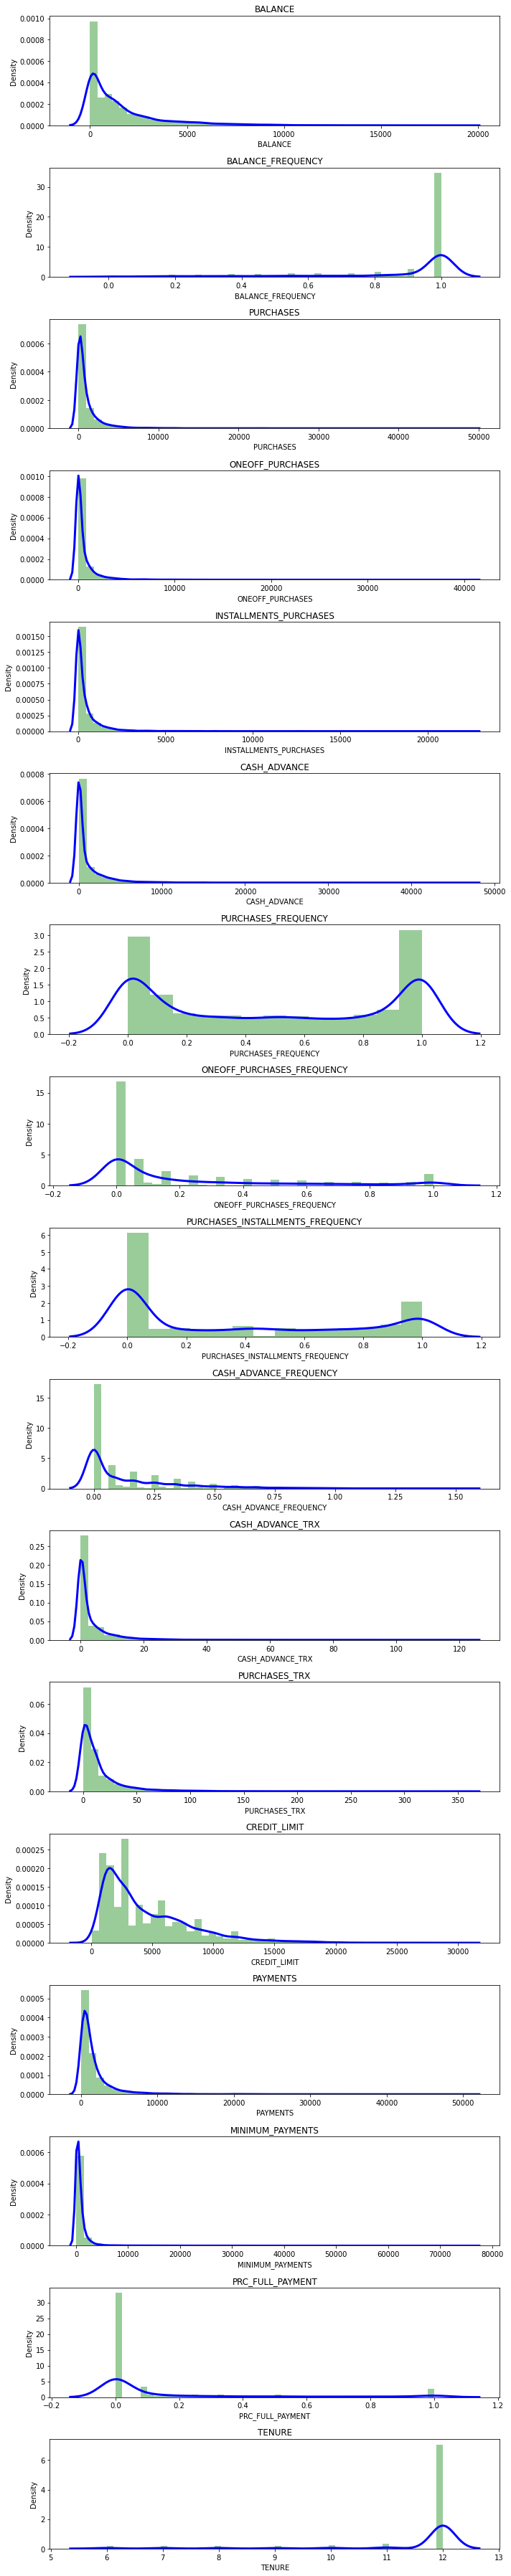

In [17]:
plt.figure(figsize = (10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

In [18]:
correlations = creditcard_df.corr()

<AxesSubplot:>

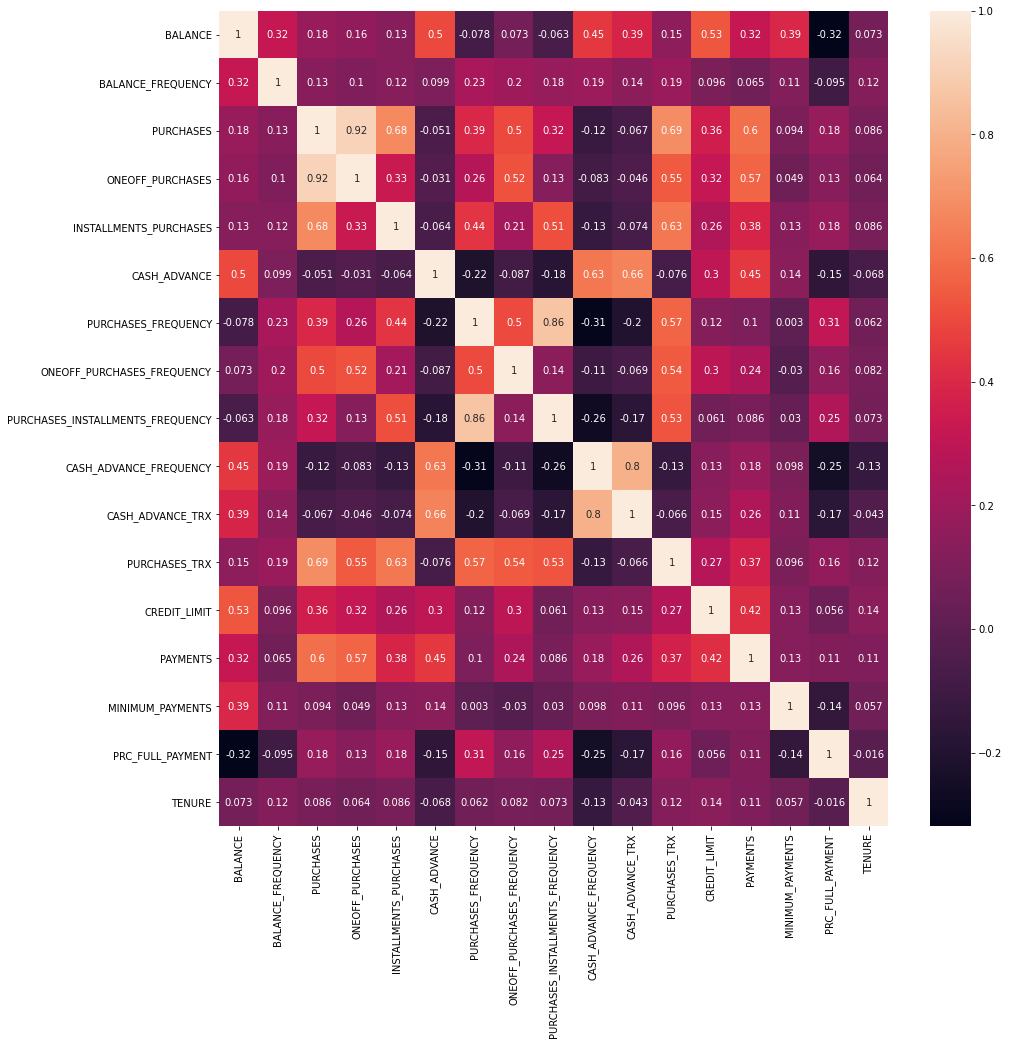

In [19]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot = True)

In [20]:
# add observations here
#have high correlation between .. and ...
#strong positive correlation between.. and..

In [21]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [22]:
creditcard_df_scaled.shape

(8950, 17)

In [23]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [24]:
scores_1 = []

#values of k
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)


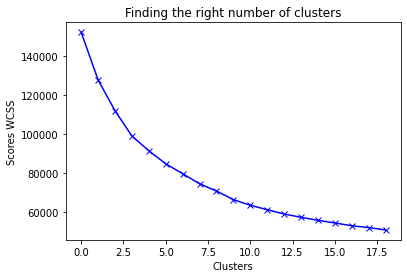

In [25]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [26]:
# It starts to saturate around values 7.5-8
# So the fourth cluster seems to form the elbow of the curve
# let's make the number of clusters to be 8

kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [27]:
labels

array([1, 3, 5, ..., 0, 0, 0], dtype=int32)

In [28]:
kmeans.cluster_centers_.shape

(8, 17)

In [29]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

In [30]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336536,-0.346748,-0.286714,-0.212513,-0.287144,0.068083,-0.200686,-0.282972,-0.225256,0.306399,-0.000298,-0.387158,-0.563575,-0.391392,-0.209433,0.014474,-3.200691
1,0.008843,0.404938,-0.354341,-0.238940,-0.398750,-0.099050,-0.842049,-0.383428,-0.751558,0.095905,-0.033922,-0.477887,-0.305949,-0.251902,-0.013122,-0.455151,0.273515
2,-0.358413,0.331759,-0.030024,-0.240746,0.371103,-0.362588,0.995611,-0.380981,1.206818,-0.471999,-0.359654,0.194618,-0.259622,-0.213290,-0.029858,0.313600,0.255570
3,1.672951,0.390531,-0.221331,-0.157770,-0.233551,1.999737,-0.481568,-0.213481,-0.421808,1.909869,1.916129,-0.271317,1.015488,0.814604,0.548358,-0.391211,0.071124
4,-0.700928,-2.138065,-0.309875,-0.234351,-0.302036,-0.322516,-0.553674,-0.440210,-0.439588,-0.521496,-0.376524,-0.418513,-0.175016,-0.202031,-0.256786,0.281800,0.199250
5,-0.119467,0.403212,0.565086,0.684872,0.077706,-0.332015,0.998929,1.914414,0.215562,-0.416725,-0.332412,0.660188,0.466389,0.162974,-0.155294,0.459225,0.274613
6,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


In [31]:
# perform inverse transformation to understand what these numbers mean
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])

In [32]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,864.004329,0.795129,390.635481,239.709567,151.406683,1121.643684,0.409806,0.118042,0.274915,0.196458,3.246795,5.086538,2443.933413,600.101401,376.130772,0.157948,7.233974
1,1582.881762,0.973197,246.150220,195.845652,50.483290,771.159443,0.152396,0.088074,0.065749,0.154336,3.017335,2.831347,3381.280847,1003.911433,833.626300,0.020591,11.883351
2,818.468122,0.955861,939.057226,192.847806,746.651857,218.506368,0.889937,0.088804,0.844058,0.040692,0.794453,19.547301,3549.836653,1115.691351,794.623491,0.245437,11.859336
3,5046.581251,0.969784,530.327170,330.572295,199.870409,5172.413840,0.297074,0.138772,0.196800,0.517329,16.325000,7.965909,8189.209711,4091.341643,2142.131757,0.039292,11.612500
4,105.552739,0.370783,341.151561,203.462143,137.939882,302.539864,0.268134,0.071134,0.189734,0.030788,0.679325,4.307173,3857.670417,1148.284840,265.777795,0.236136,11.783966
5,1315.813676,0.972788,2210.520143,1729.183911,481.336232,282.619724,0.891269,0.773565,0.450107,0.051753,0.980357,31.119643,6191.363636,2204.938747,502.301443,0.288030,11.884821
6,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [33]:
labels.shape

(8950,)

In [34]:
labels.max()

7

In [35]:
labels.min()

0

In [36]:
# Adding a column to original data frame, after tenure, that will show which cluster each data point belongs to
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [37]:
# this helps me group wayyyyy more easily! ^^

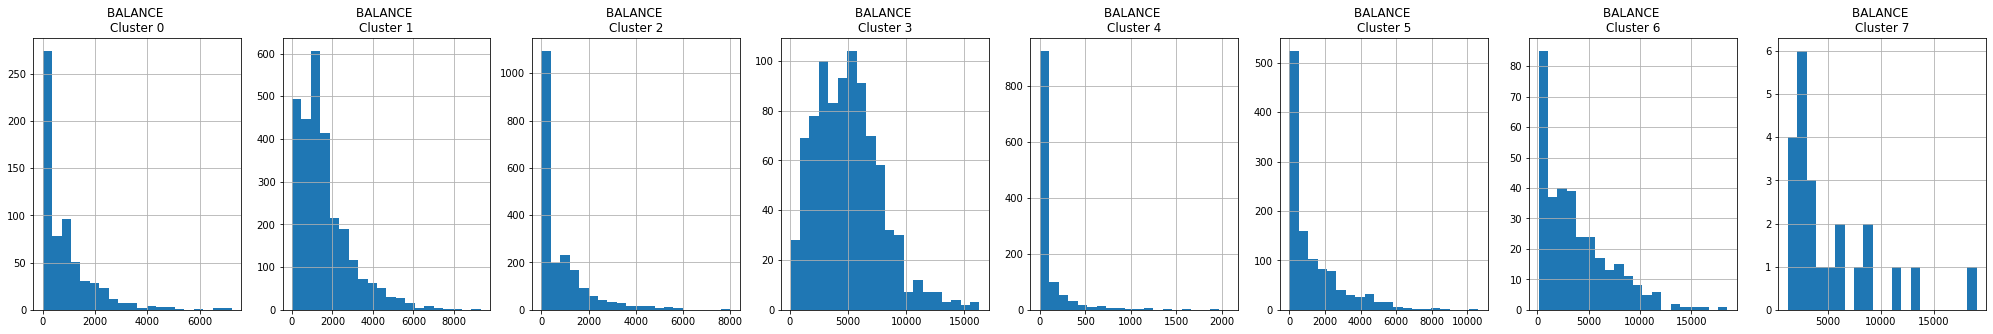

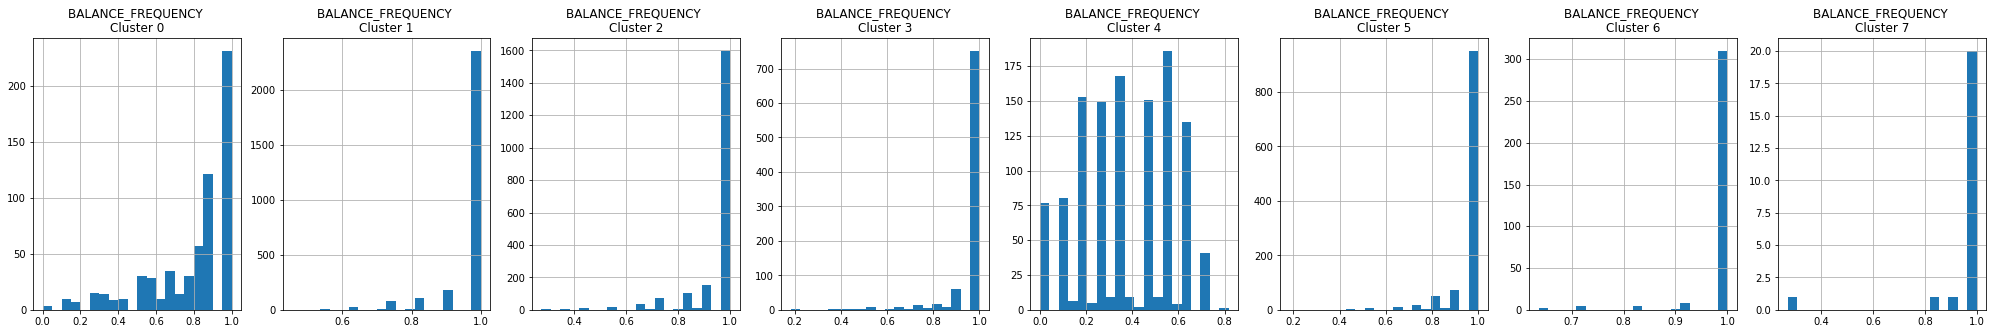

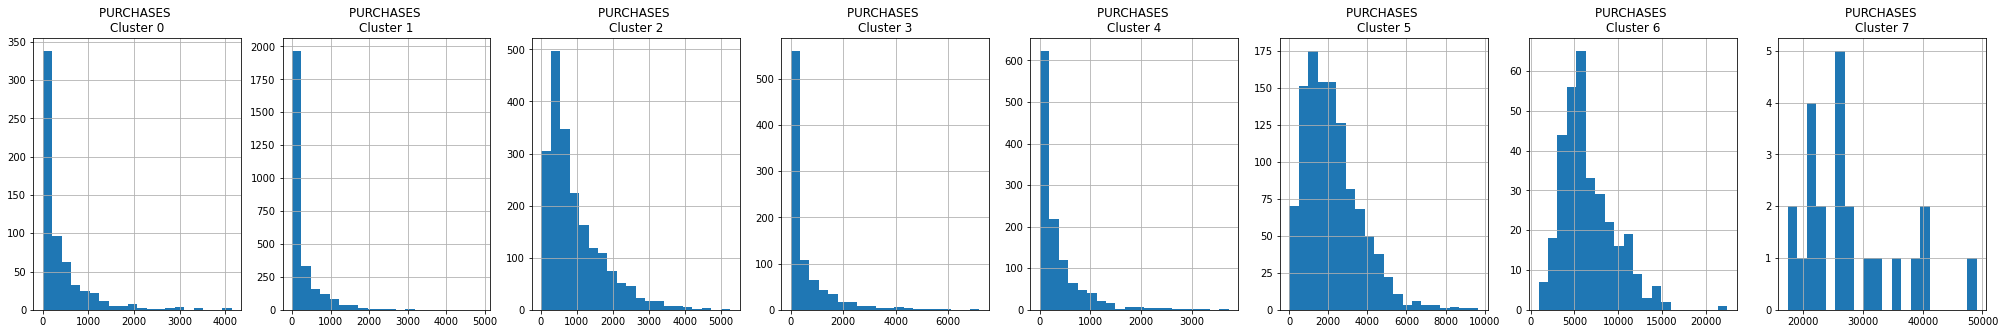

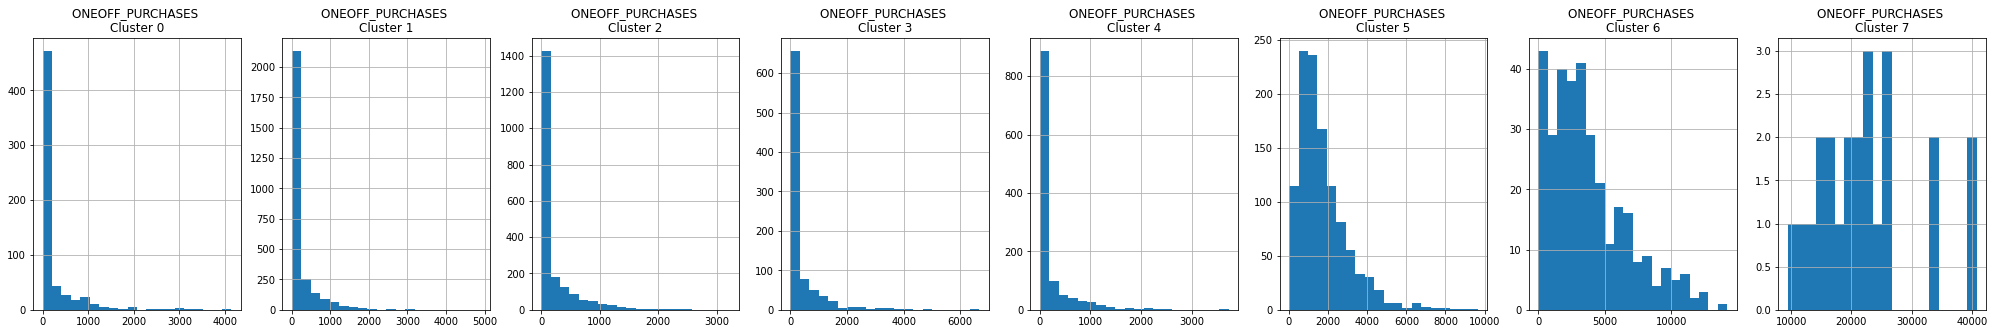

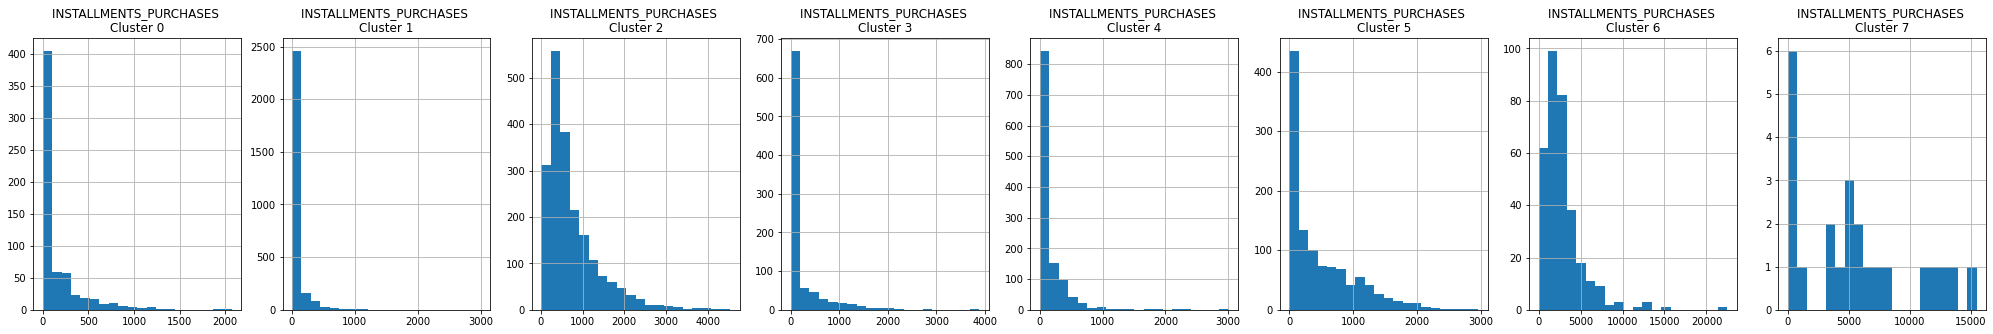

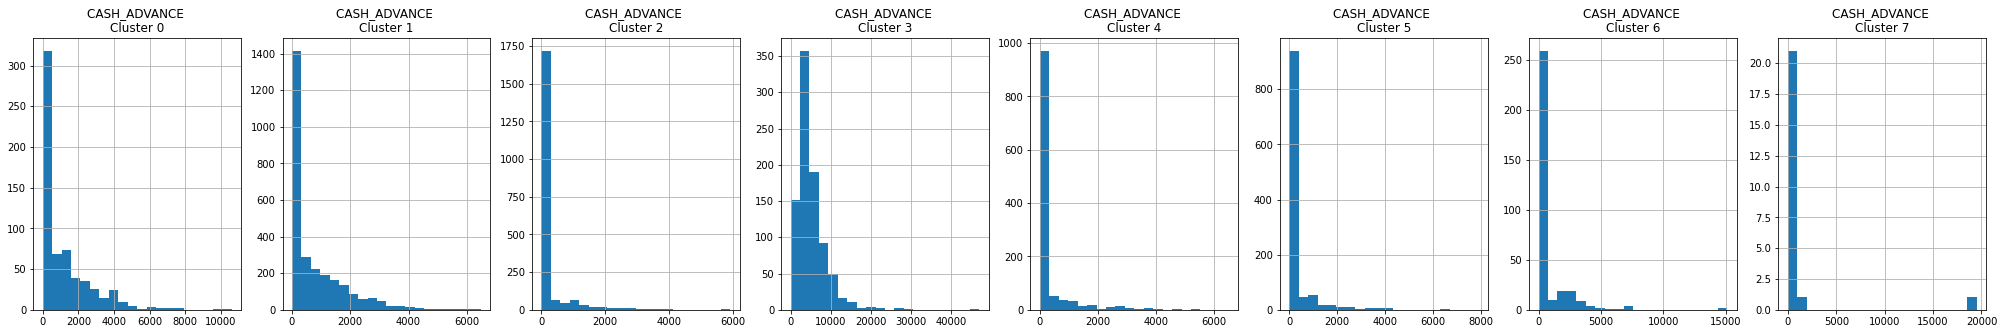

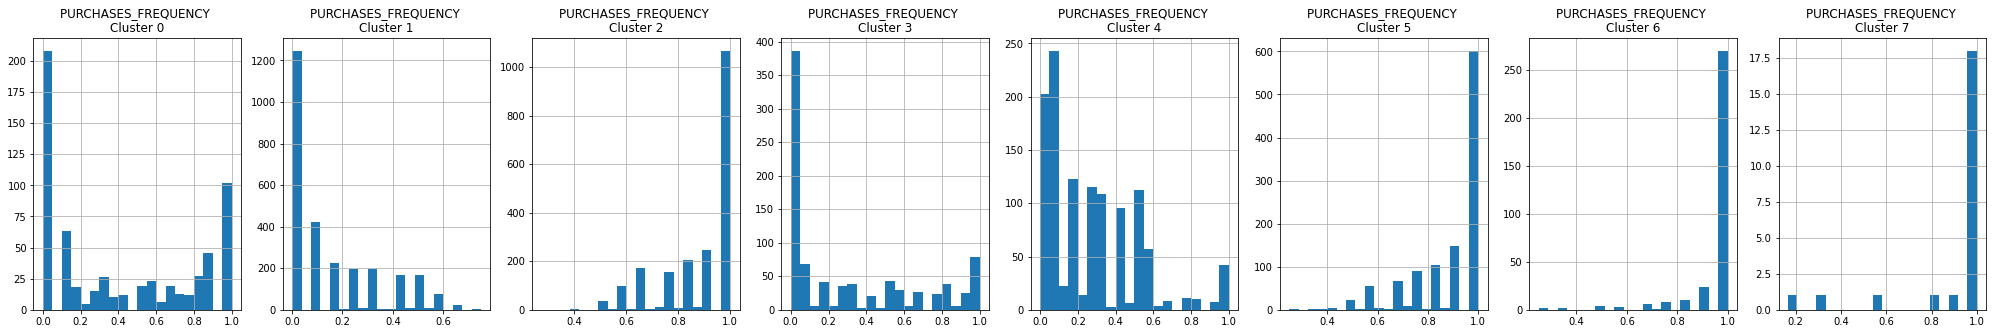

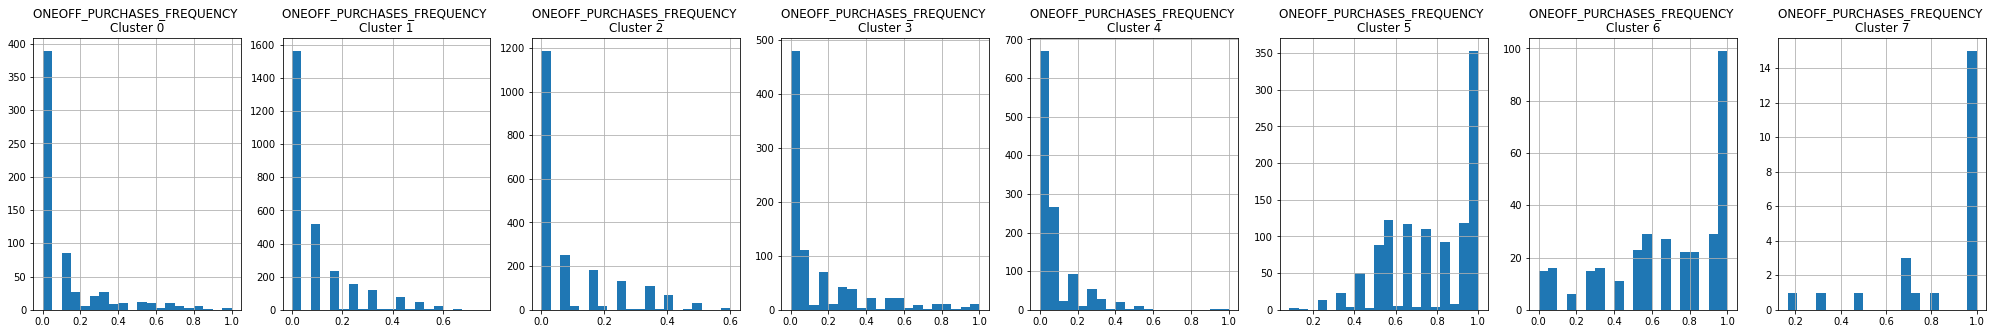

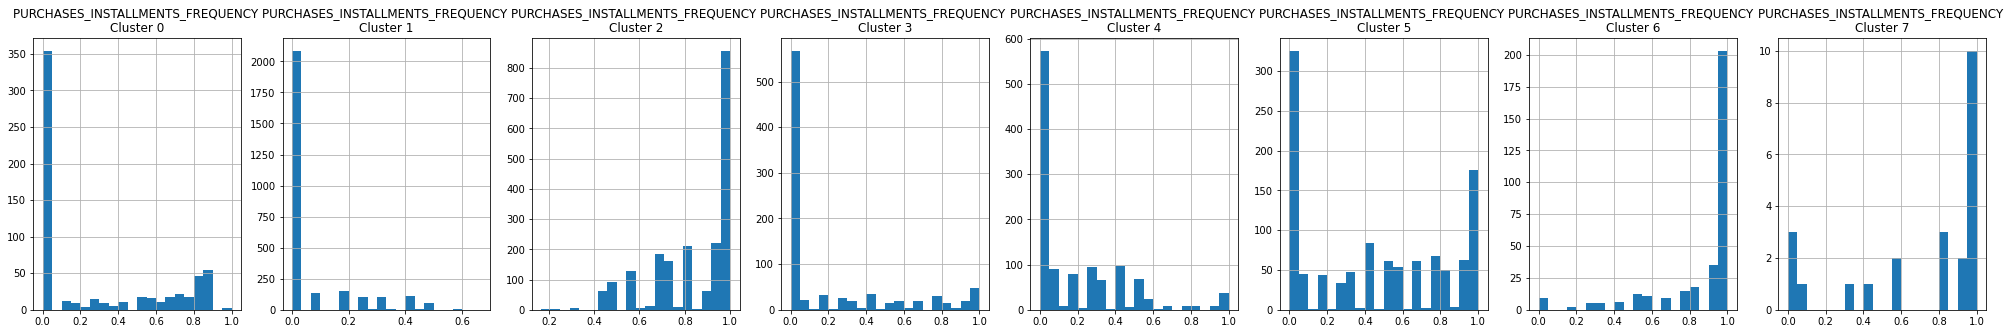

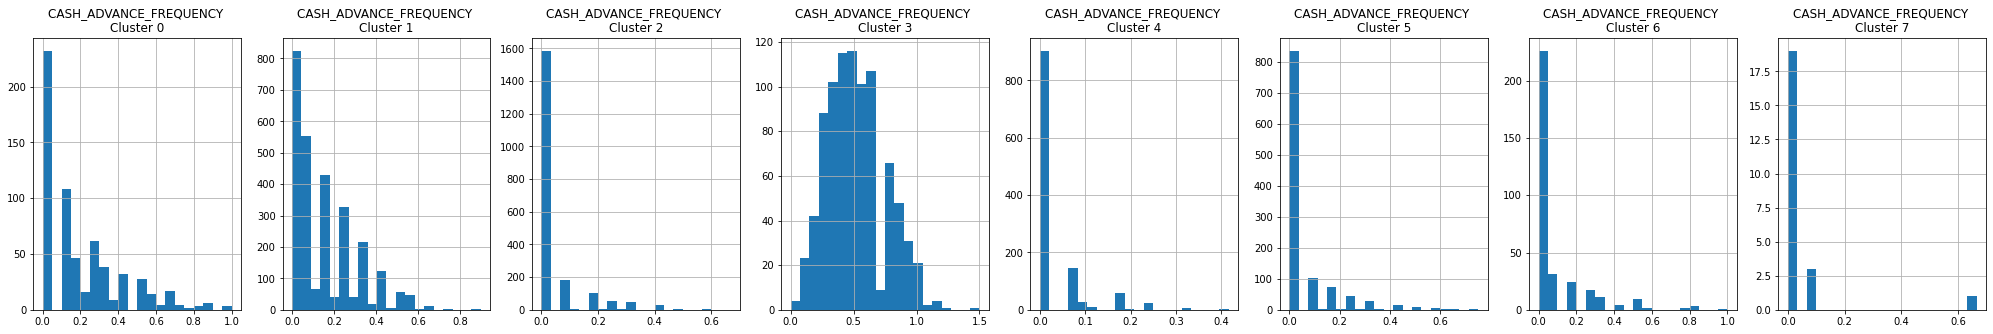

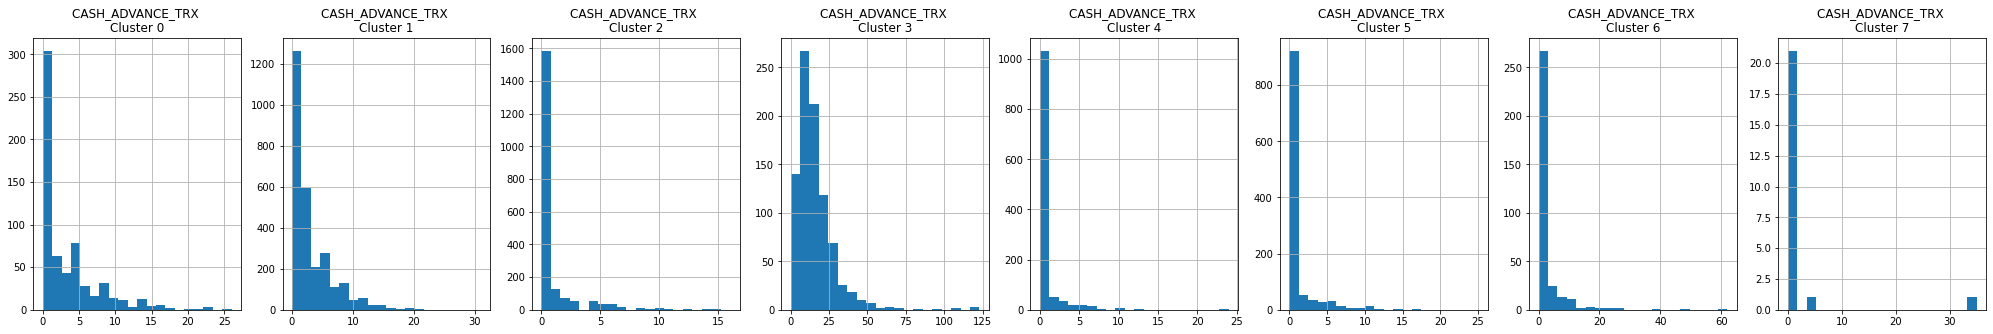

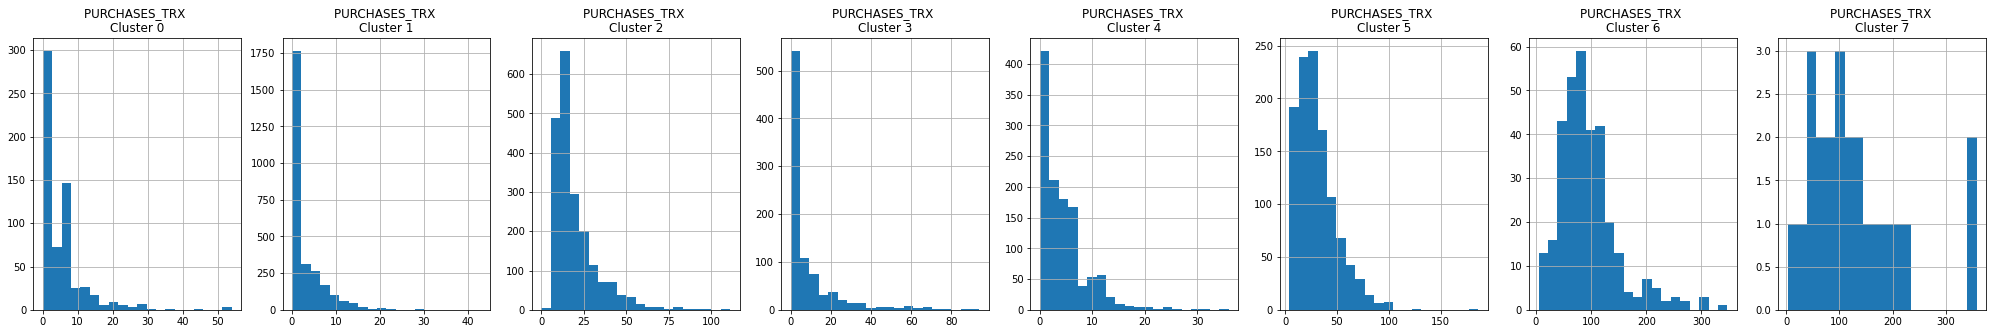

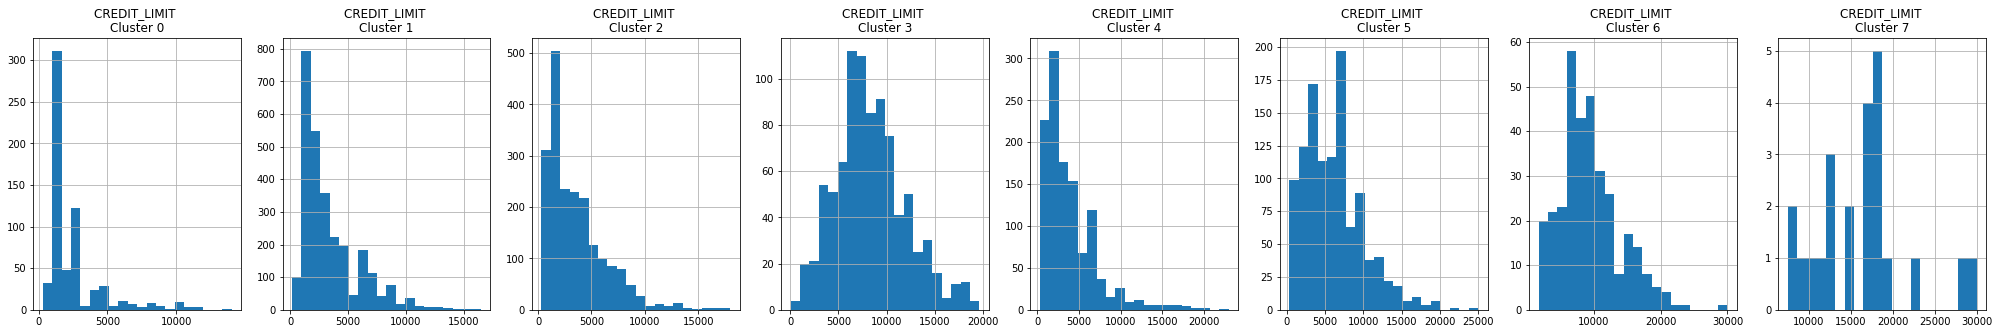

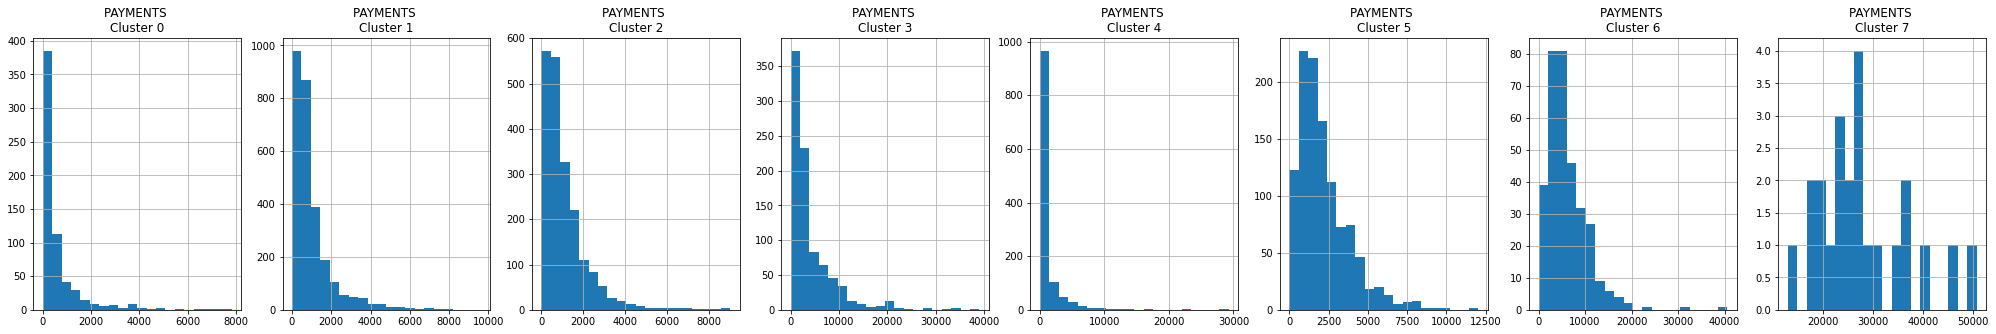

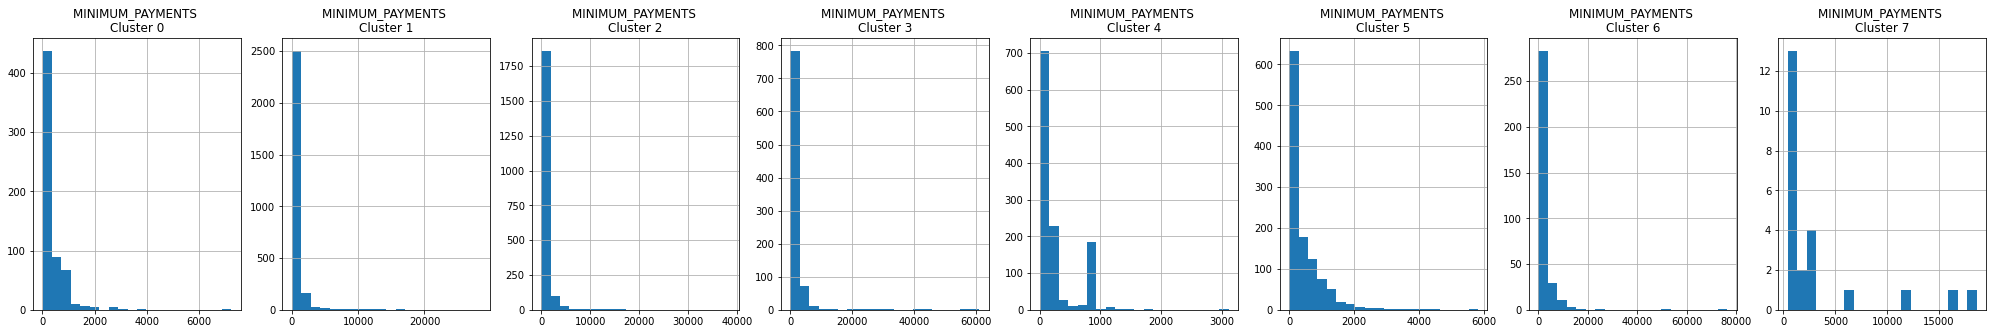

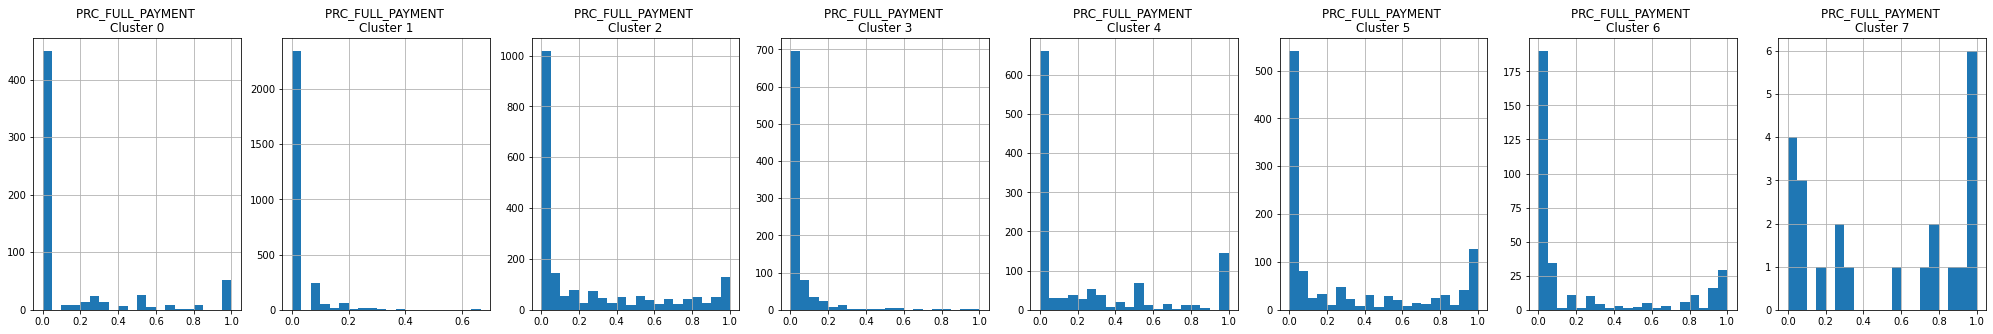

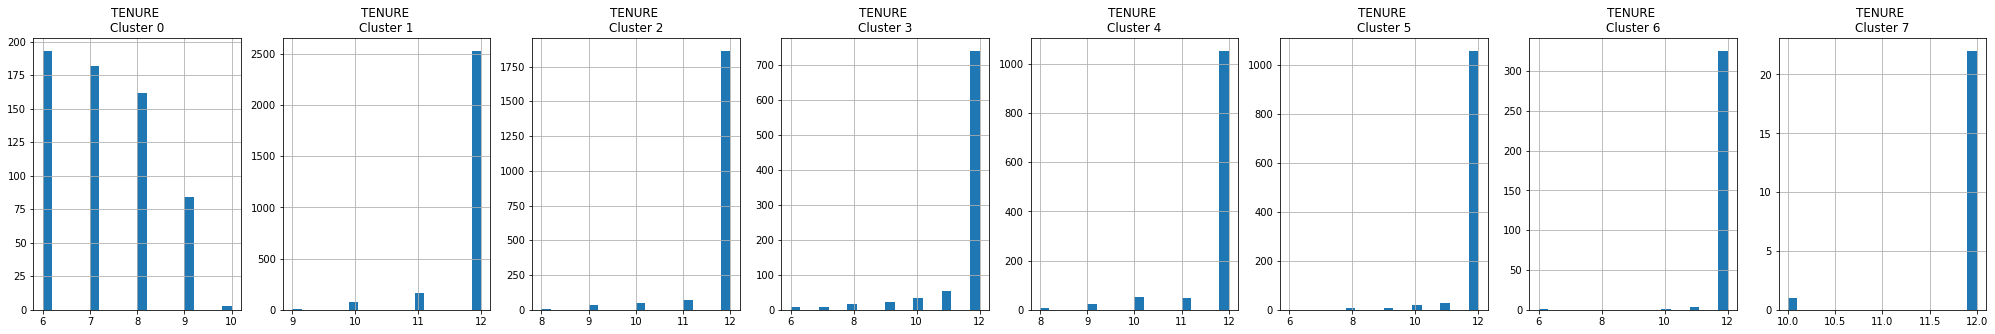

In [38]:
# histogram of various clusters
# using our new column 'cluster' as well 
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i,j))
        
plt.show()

In [39]:
# look at these and think about which customers the bank should target
# maybe those who took out a lot of cash advances?

In [40]:
# Principal Component Analysis
###@@ reducing features

In [41]:
##@@ you can choose how many components/features you want to have
pca = PCA(n_components =2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

#@ the two columns are your two components

array([[-1.68222045, -1.07644518],
       [-1.1382831 ,  2.50650266],
       [ 0.96966699, -0.38352826],
       ...,
       [-0.92623097, -1.81079132],
       [-2.33657428, -0.65797418],
       [-0.55643912, -0.40048129]])

In [42]:
# let's convert that data into a data frame
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076445
1,-1.138283,2.506503
2,0.969667,-0.383528
3,-0.873614,0.043182
4,-1.599438,-0.688581


In [43]:
# concatenate the clusters labels to the dataframe
#@ remember that this pca_df is your new one, after PCA!
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076445,1
1,-1.138283,2.506503,3
2,0.969667,-0.383528,5
3,-0.873614,0.043182,1
4,-1.599438,-0.688581,1


In [44]:
# why is my cluster column showing twice??
# and cluster values "should be" 0,5,3,0,0
# ??
#new_pca_df = pca_df.drop(columns=getDuplicateColumns(pca_df))
# ^^ Nope! 
# But I figured it out!!!!!
pca_df = pca_df.loc[:,~pca_df.columns.duplicated()]
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076445,1
1,-1.138283,2.506503,3
2,0.969667,-0.383528,5
3,-0.873614,0.043182,1
4,-1.599438,-0.688581,1


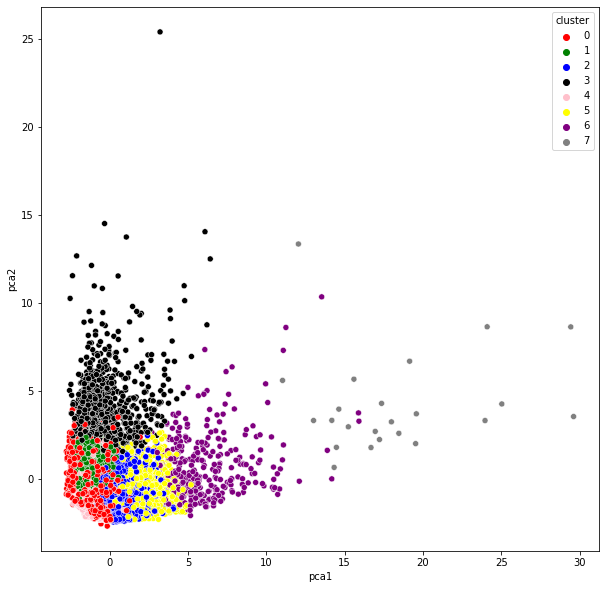

In [45]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red','green','blue','black','pink','yellow','purple','gray'])

In [46]:
##@ so this is basically the result of combining the results of kmeans and pca, all in one visualization

In [49]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [52]:
input_df = Input(shape =(17,))

In [54]:
x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
creditcard_df_scaled.shape

(8950, 17)

In [57]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 2s 22ms/step - loss: 0.5292
Epoch 2/25
70/70 [==============================] - 2s 21ms/step - loss: 0.3125
Epoch 3/25
70/70 [==============================] - 2s 21ms/step - loss: 0.2621
Epoch 4/25
70/70 [==============================] - 1s 21ms/step - loss: 0.2349
Epoch 5/25
70/70 [==============================] - 1s 21ms/step - loss: 0.1947
Epoch 6/25
70/70 [==============================] - 2s 24ms/step - loss: 0.1828
Epoch 7/25
70/70 [==============================] - 1s 21ms/step - loss: 0.1628
Epoch 8/25
70/70 [==============================] - 2s 24ms/step - loss: 0.1569
Epoch 9/25
70/70 [==============================] - 2s 22ms/step - loss: 0.1442
Epoch 10/25
70/70 [==============================] - 2s 27ms/step - loss: 0.1496
Epoch 11/25
70/70 [==============================] - 2s 24ms/step - loss: 0.1292
Epoch 12/25
70/70 [==============================] - 1s 20ms/step - loss: 0.1183
Epoch 13/25
70/70 [==================

In [63]:
# input and output have the same dimensions (17)
# created a bottleneck in the network
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_2 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              22000 

In [64]:
pred = encoder.predict(creditcard_df_scaled)

In [65]:
pred

array([[0.09159957, 0.38005367, 0.        , ..., 0.45999435, 0.        ,
        0.        ],
       [1.6632358 , 0.9322126 , 0.        , ..., 1.2874304 , 0.        ,
        0.        ],
       [2.215251  , 1.110836  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.49445525, 1.938704  , 0.        , ..., 4.4618073 , 0.        ,
        0.        ],
       [0.14941353, 0.83359736, 0.        , ..., 3.5225985 , 0.        ,
        0.        ],
       [1.1641597 , 0.9232202 , 0.        , ..., 3.9203517 , 0.        ,
        0.        ]], dtype=float32)

In [67]:
# went from 17 features to 10
pred.shape

(8950, 10)

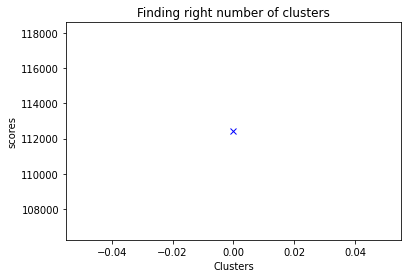

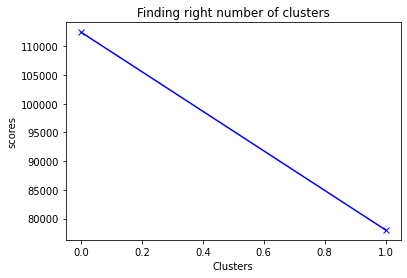

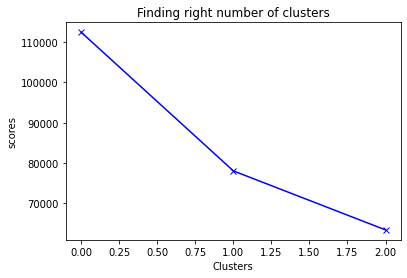

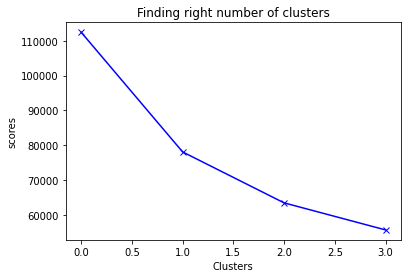

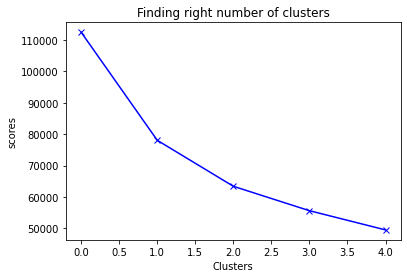

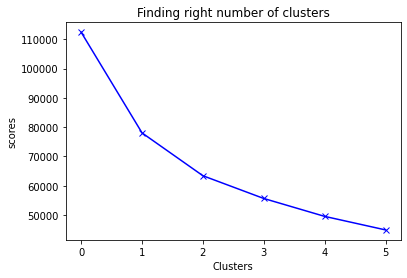

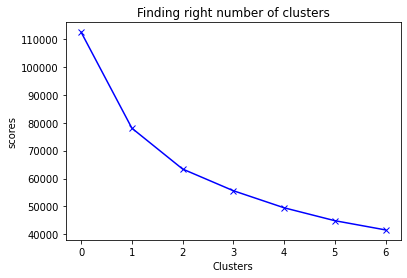

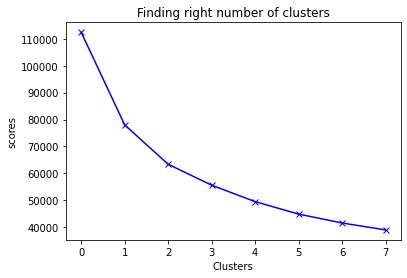

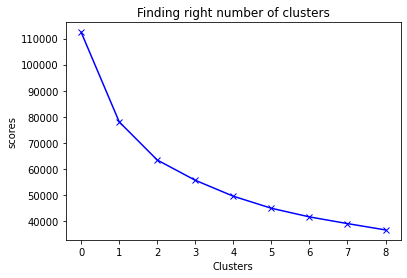

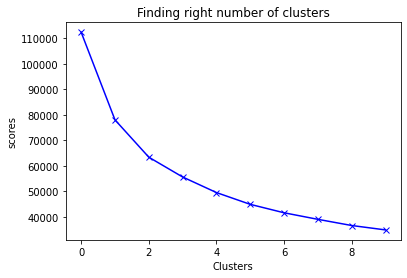

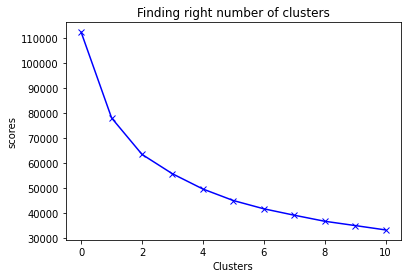

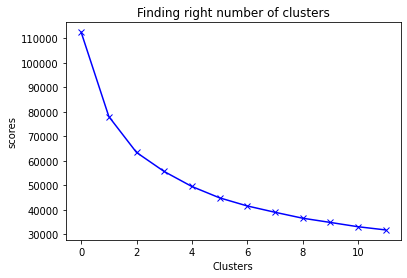

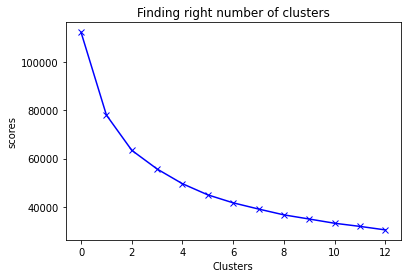

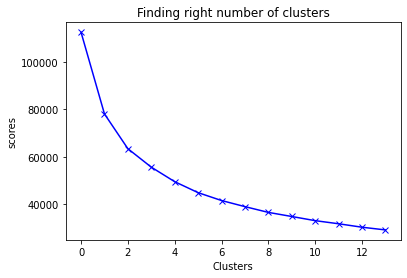

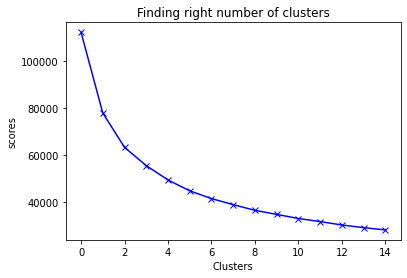

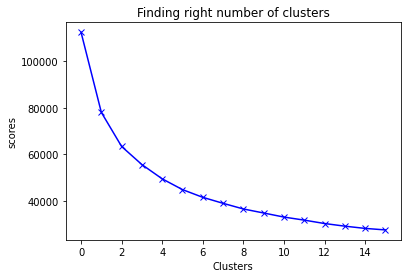

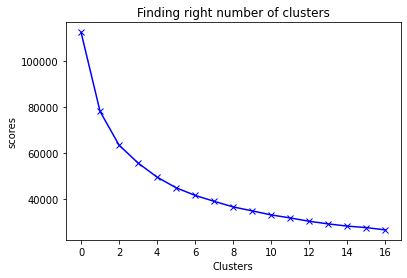

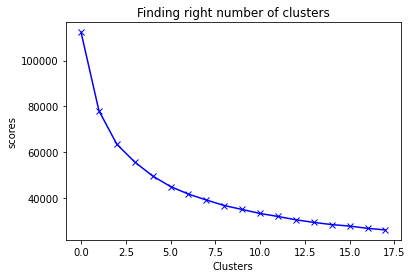

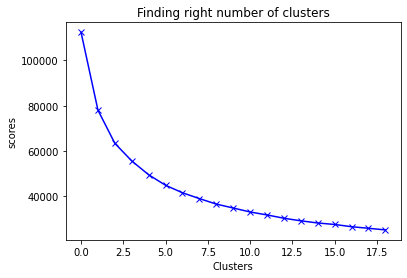

In [68]:
# come up with another vector
scores_2 = []
# different values of k that we can apply
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)
    
    plt.plot(scores_2, 'bx-')
    plt.title('Finding right number of clusters')
    plt.xlabel('Clusters')
    plt.ylabel('scores')
    plt.show()

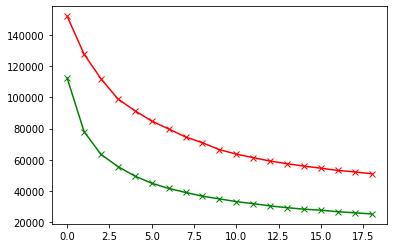

In [69]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [70]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [71]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [72]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1','pca2'])

In [73]:
# concatenate our labels to our dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-2.503276,-0.212289,3
1,0.670090,2.465690,0
2,-1.299291,-0.743419,3
3,-1.693585,-0.148074,3
4,-2.379906,-0.259033,3


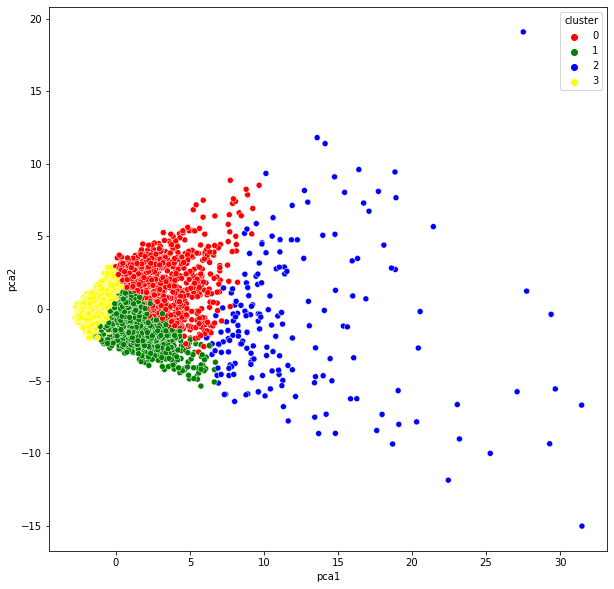

In [75]:
# further dimensionality reduction, down to 4 clusters
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue','yellow'])